In [1]:
import tweepy
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib

In [2]:
CONSUMER_KEY = "pBLoazfzVHC6KEtjWujc3BQZH"
CONSUMER_SECRET = "62gsKm50t5p4WboCxjyCDhtXcFuaZaDRUc2Y55CrvAlZgGtbUi"
ACCESS_TOKEN_KEY = "1565145648214659072-DlVkq5zmYtVSrWqJrDjsg4LVSk5SYX"
ACCESS_TOKEN_SECRET = "plT89r9QT5JLVB4o7Q1pxvHujhfOFx7L2CxMOOPSTOJ6Q"

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
me = api.get_user(screen_name = "csapac")
me.id

91798372

In [5]:
user_list = [me.id]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            follower_list.extend(page)
        follower_list.append(followers)
    except tweepy.TweepyException:
        print("error")
        continue


In [6]:
df = pd.DataFrame(columns = ['source', 'target', 'follower_count'])
df['target'] = follower_list
df['source'] = me.id
for i in range(len(df)):
    temp = api.get_user(user_id = df['target'][i])
    df['follower_count'][i] = temp.followers_count
    df.to_csv('credit_suiss_twitter1.csv', index = False)
df

C:\Users\ZY\AppData\Local\Temp\ipykernel_34340\685467742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['follower_count'][i] = temp.followers_count
Rate limit reached. Sleeping for: 514
Rate limit reached. Sleeping for: 228
Rate limit reached. Sleeping for: 251
Rate limit reached. Sleeping for: 250


KeyboardInterrupt: 

In [24]:
df = pd.read_csv('credit_suiss_twitter1.csv')
df

,source,target,follower_count
0,91798372,559525816,10.0
1,91798372,1588562628401561600,23.0
2,91798372,1381406496005758978,85.0
3,91798372,118787477,13.0
4,91798372,1934719434,175.0
...,...,...,...
13293,91798372,143371709,NaN
13294,91798372,81463002,NaN
13295,91798372,111336759,NaN
13296,91798372,121111035,NaN


In [25]:
# Set node sizes
df = df.sort_values(by=['follower_count'], ascending=False)
df = df[:26].reset_index()
size = [(df['follower_count'][i])/250 for i in range(len(df))]
size
for i in range(len(df)):
    df['source'][i] = 'Credit Suiss'
    df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name
    # size.append(4000 if df['follower_count'][i] > 1000000 else 1000)


C:\Users\ZY\AppData\Local\Temp\ipykernel_34340\3465704341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'][i] = 'Credit Suiss'
C:\Users\ZY\AppData\Local\Temp\ipykernel_34340\3465704341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name


In [26]:
df

,index,source,target,follower_count
0,40,Credit Suiss,JohnCena,13986756.0
1,453,Credit Suiss,rory_macdonald,242595.0
2,2795,Credit Suiss,Ajay_Bagga,188154.0
3,555,Credit Suiss,NCagnati,162753.0
4,398,Credit Suiss,rexteo_ups,162535.0
5,1680,Credit Suiss,hannytalker,100672.0
6,463,Credit Suiss,utkudemirsoy,93899.0
7,3444,Credit Suiss,AjitPai,84761.0
8,3700,Credit Suiss,SPGMarketIntel,64864.0
9,2404,Credit Suiss,sarahintampa,63635.0


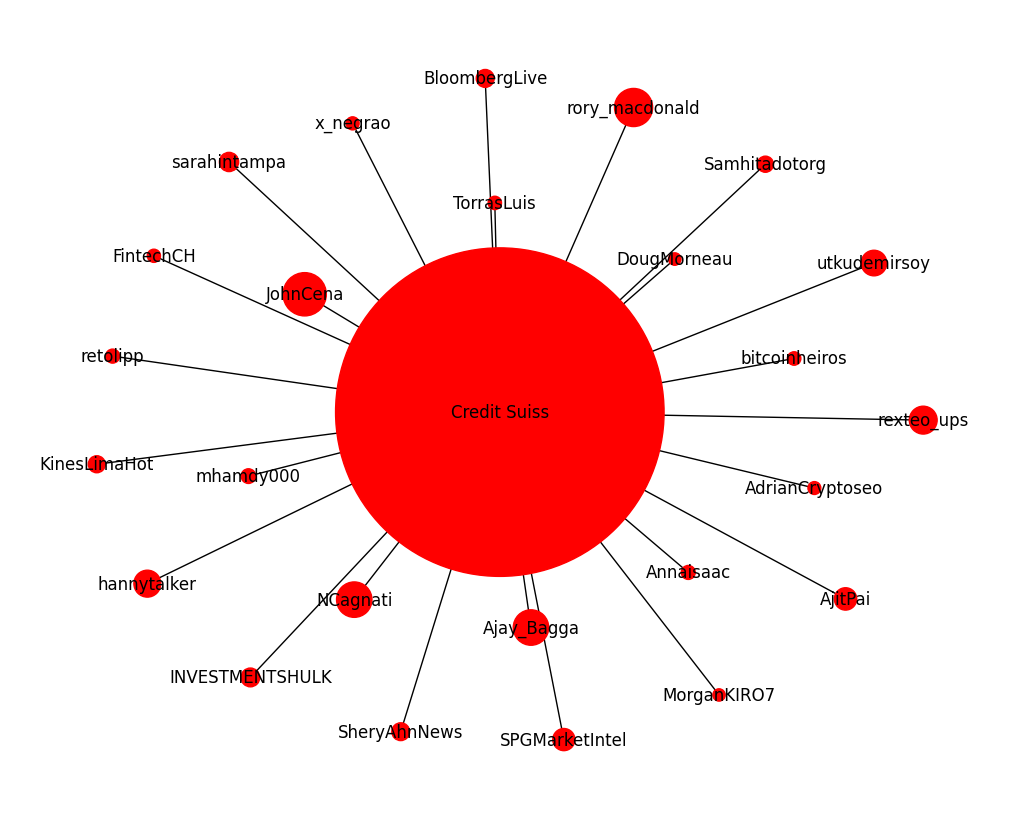

In [27]:
G = nx.from_pandas_edgelist(df[:-1], source='source', target='target')
figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='red', node_size=size)
plt.savefig("credit_suiss_twitter_followers.png")
plt.show()
